In [1]:
import pandas as pd

In [4]:
df = pd.DataFrame({'A': ['a','b','c','a','b'],
                   'B' : [1, 2, 3, 1, 0]})

df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


### Label encoder 

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])

LabelEncoder()

In [6]:
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [8]:
le.transform(df['A'])

array([0, 1, 2, 0, 1])

In [9]:
df['le_A']=le.transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [10]:
# fit 과 transform 한번에 수행 
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [11]:
# 다시 문자로 변경 
le.inverse_transform(df['le_A'])

array(['a', 'b', 'c', 'a', 'b'], dtype=object)

### min_mas scaling


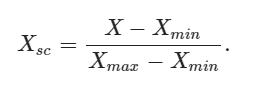

In [12]:
df = pd.DataFrame({'A': [10, 20, -10, 0, 25],
                   'B' : [1, 2, 3, 1, 0]})

df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [14]:
mms.data_max_, mms.data_min_, mms.data_range_

(array([25.,  3.]), array([-10.,   0.]), array([35.,  3.]))

In [15]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [16]:
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

### Standard Scare



In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [18]:
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [19]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

### Robust Scaler
Robust Scaler는 중앙값(median)과 사분위 범위(interquartile range, IQR)를 사용하여 데이터를 정규화

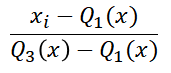

In [25]:
df = pd.DataFrame({'A': [-.1, 0., .1, .2, .3, .4, 1., 1.1, 5.]})

df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [27]:
df_scaler = df.copy()

df_scaler['MinMax']=mm.fit_transform(df)
df_scaler['Standard']=ss.fit_transform(df)
df_scaler['Robust']=rs.fit_transform(df)

In [28]:
df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


In [39]:
# %load ../set_matplotlib_hangul.py

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

# %matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

path='C:/Windows/Fonts/malgun.ttf'
plt.rcParams['axes.unicode_minus'] = False

if platform.system()=="Darwin": #mac
    rc("font",family='Arial Unicodes MS')
    sns.set(font='Arial Unicodes MS', 
        rc={"axes.unicode_minus":False}),
    print('MAC Hangul OK')
elif platform.system()=="Windows":  #window
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc("font",family=font_name)
    sns.set(font=font_name, 
    rc={"axes.unicode_minus":False})
    print('WIndow Hangul OK')
    
else:
    print('Unknown System')
    


WIndow Hangul OK


In [42]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(16,6))
plt.barplot(data=df_scaler, orient='h')

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

<Figure size 1600x600 with 0 Axes>